# Is there a relationship between the vote for evaluating movies (vote_average), the investment (production budget) and the rate or return ? 

With this question we would like to address three different points:
1. Possible relationship between investment/production cost, and the movie review
2. Possible relationship between investment/production cost and rate of return
2. the importance of the audience support/satisfaction when it comes to profit regardless of the experts critics. We believe than in many cases the critics don't reflect the rate of return of some titles, therefore, special attention should be given to this subject.

We will start by loading all the necessary libraries including the magic %matplotlib inline that will allow us to display plots on our notebook, followed by connecting to our SQL database

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
import sqlite3
conn = sqlite3.connect('movies_db_nj.sqlite')
cur = conn.cursor()

From our SQL database we have taken information from two tables previously cleaned in pandas. However, because we are unfamiliar with the origin of these tables, there is the possibility that once df have been created, they will need further cleaning, although not much is expected

The next code will correspond then to an SQL query that will allow us to generate a df with the data of interest. Because we are working with vote_average, and this depends mainly on the vote_count, we are asking in the query to only pass the vote_average if there have been a minimum of 1000 votes (vote_count > 1000). This way we will eliminate all of those movies that have a few votes and are ranked very high. 1000 might be a bit to tight, but this will have to bee a simple try and error exercise. 

In [76]:
cur.execute("""SELECT a.original_title, a.popularity, a.release_date, a.vote_average, a.vote_count, b.movie_title, b.production_budget, b.worldwide_gross, b.domestic_gross, b.foreign_gross, b.profit
               FROM tmdb_movies a
               JOIN tn_movies_budgets b
               ON a.original_title = b.movie_title
               WHERE a.vote_count > 1000
               ORDER BY a.vote_average DESC;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
df.head()

,original_title,popularity,release_date,vote_average,vote_count,movie_title,production_budget,worldwide_gross,domestic_gross,foreign_gross,profit
0,Once Upon a Time in America,17.717,1984-06-01,8.4,2243,Once Upon a Time in America,30000000,5575648,5321508,254140,-24424352
1,Whiplash,28.784,2014-10-10,8.4,7908,Whiplash,3300000,38969037,13092006,25877031,35669037
2,Inception,27.920,2010-07-16,8.3,22186,Inception,160000000,835524642,292576195,542948447,675524642
3,Mommy,11.095,2014-08-29,8.3,1399,Mommy,4900000,17536004,3498695,14037309,12636004
4,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,Avengers: Infinity War,300000000,2048134200,678815482,1369318718,1748134200


The join (original_title & movie_title) between the two tables was use to QC the rows and further clean by dropping the duplicate columns. Now that they have been QCed we will drop the 'movie_title' column and run a .head() to look at the first 5 rows of data


The axis=1, indicates to drop the columns labels

In [77]:
df = df.drop(['movie_title'], axis=1)

In [78]:
df.head()

,original_title,popularity,release_date,vote_average,vote_count,production_budget,worldwide_gross,domestic_gross,foreign_gross,profit
0,Once Upon a Time in America,17.717,1984-06-01,8.4,2243,30000000,5575648,5321508,254140,-24424352
1,Whiplash,28.784,2014-10-10,8.4,7908,3300000,38969037,13092006,25877031,35669037
2,Inception,27.920,2010-07-16,8.3,22186,160000000,835524642,292576195,542948447,675524642
3,Mommy,11.095,2014-08-29,8.3,1399,4900000,17536004,3498695,14037309,12636004
4,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,300000000,2048134200,678815482,1369318718,1748134200


The rate of return is a percentage based on the calculation of the profit multiplied by 100, then divided by the production_budget. We don't have these values in our dataframe, therefore it will be calculated and added as a new column to the existing dataframe

In [79]:
# Rate of return calculation:

df['rate_of_return'] = df['profit'] * 100 / df['production_budget']
df.head(10)

,original_title,popularity,release_date,vote_average,vote_count,production_budget,worldwide_gross,domestic_gross,foreign_gross,profit,rate_of_return
0,Once Upon a Time in America,17.717,1984-06-01,8.4,2243,30000000,5575648,5321508,254140,-24424352,-81.414507
1,Whiplash,28.784,2014-10-10,8.4,7908,3300000,38969037,13092006,25877031,35669037,1080.879909
2,Inception,27.920,2010-07-16,8.3,22186,160000000,835524642,292576195,542948447,675524642,422.202901
3,Mommy,11.095,2014-08-29,8.3,1399,4900000,17536004,3498695,14037309,12636004,257.877633
4,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,300000000,2048134200,678815482,1369318718,1748134200,582.711400
5,Green Book,36.284,2018-11-16,8.3,3499,23000000,322034439,85080171,236954268,299034439,1300.149735
6,The Lion King,28.583,1994-06-23,8.2,10160,79300000,986214868,421785283,564429585,906914868,1143.650527
7,Interstellar,28.440,2014-11-05,8.2,18597,165000000,666379375,188017894,478361481,501379375,303.866288
8,Coco,25.961,2017-11-22,8.2,8669,175000000,798008101,209726015,588282086,623008101,356.004629
9,Wonder,20.101,2017-11-17,8.2,3959,20000000,304604712,132422809,172181903,284604712,1423.023560


We will now sort the dataframe with by popularity. For this purpose we have created an empty list (vote_average_range) which will be filled up via .append()  as wee go through a for loop with a series of conditions. Basically what we want to do is create less categories for the evaluations instead of having a very broad number of them to plot. 

As it is described in the code below, we will create 8 groups and these will be our x-axis values for most of the plots

In [80]:
vote_average_range = []

for value in df["vote_average"]:
    if value >= 8:
        vote_average_range.append(">= 8.0")
    elif value > 7.5:
        vote_average_range.append("7.5 to < 8.0")
    elif value > 7.0:
        vote_average_range.append("7.0 to < 7.5")
    elif value > 6.5:
        vote_average_range.append("6.5 to < 7.0")
    elif value > 6.0:
        vote_average_range.append("6.0 to < 6.5")
    elif value >= 5.5:
        vote_average_range.append("5.5 to < 6.0")
    else:
        vote_average_range.append("< 5.5")
        
df['Vavg_range'] = vote_average_range
df.head(10)

,original_title,popularity,release_date,vote_average,vote_count,production_budget,worldwide_gross,domestic_gross,foreign_gross,profit,rate_of_return,Vavg_range
0,Once Upon a Time in America,17.717,1984-06-01,8.4,2243,30000000,5575648,5321508,254140,-24424352,-81.414507,>= 8.0
1,Whiplash,28.784,2014-10-10,8.4,7908,3300000,38969037,13092006,25877031,35669037,1080.879909,>= 8.0
2,Inception,27.920,2010-07-16,8.3,22186,160000000,835524642,292576195,542948447,675524642,422.202901,>= 8.0
3,Mommy,11.095,2014-08-29,8.3,1399,4900000,17536004,3498695,14037309,12636004,257.877633,>= 8.0
4,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,300000000,2048134200,678815482,1369318718,1748134200,582.711400,>= 8.0
5,Green Book,36.284,2018-11-16,8.3,3499,23000000,322034439,85080171,236954268,299034439,1300.149735,>= 8.0
6,The Lion King,28.583,1994-06-23,8.2,10160,79300000,986214868,421785283,564429585,906914868,1143.650527,>= 8.0
7,Interstellar,28.440,2014-11-05,8.2,18597,165000000,666379375,188017894,478361481,501379375,303.866288,>= 8.0
8,Coco,25.961,2017-11-22,8.2,8669,175000000,798008101,209726015,588282086,623008101,356.004629,>= 8.0
9,Wonder,20.101,2017-11-17,8.2,3959,20000000,304604712,132422809,172181903,284604712,1423.023560,>= 8.0


In [81]:
# alternative way
#df['Vavg_range'] = np.nan
#df['Vavg_range'] = np.where(df['vote_average']>=8,'>=8.0',df['Vavg_range'])
#df['Vavg_range'] = np.where((df['vote_average']>=7.5)and(df['vote_average']<8),'7.5-8',df['Vavg_range'])
#...

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
original_title       840 non-null object
popularity           840 non-null float64
release_date         840 non-null object
vote_average         840 non-null float64
vote_count           840 non-null int64
production_budget    840 non-null int64
worldwide_gross      840 non-null int64
domestic_gross       840 non-null int64
foreign_gross        840 non-null int64
profit               840 non-null int64
rate_of_return       840 non-null float64
Vavg_range           840 non-null object
dtypes: float64(3), int64(6), object(3)
memory usage: 78.9+ KB


For some reason we had problems creating a df calling just some columns, so as alternative we decided to create three df and then we concatenated them together

In [83]:
dfp1 = df['Vavg_range']
dfp2 = df['production_budget']
dfp3 = df['rate_of_return']

In [84]:
dfq = pd.concat([dfp1, dfp2, dfp3], axis=1)

In [85]:
dfq.head()

,Vavg_range,production_budget,rate_of_return
0,>= 8.0,30000000,-81.414507
1,>= 8.0,3300000,1080.879909
2,>= 8.0,160000000,422.202901
3,>= 8.0,4900000,257.877633
4,>= 8.0,300000000,582.711400


The concatenation worked! now we will groupby the Vavg_range  and calculate the means of the rest of the columns for our ploting and analysis purposes:

In [86]:
dfq1 = dfq.groupby(['Vavg_range']).mean()
dfq1.head(10)

,production_budget,rate_of_return
Vavg_range,,
5.5 to < 6.0,7.216361e+07,396.245613
6.0 to < 6.5,6.838762e+07,450.355481
6.5 to < 7.0,6.288411e+07,560.353134
7.0 to < 7.5,6.898301e+07,542.375868
7.5 to < 8.0,7.485185e+07,550.182136
< 5.5,6.398298e+07,430.587110
>= 8.0,5.911207e+07,690.030800


The display of our dfq1 doesn't show Vavg_range as a column, therefore we will run a reset_index, followed by a reindex to re-orgnanize the rows.

In [87]:
dfq1.reset_index(inplace=True)

In [88]:
dfq1.head(8)

,Vavg_range,production_budget,rate_of_return
0,5.5 to < 6.0,7.216361e+07,396.245613
1,6.0 to < 6.5,6.838762e+07,450.355481
2,6.5 to < 7.0,6.288411e+07,560.353134
3,7.0 to < 7.5,6.898301e+07,542.375868
4,7.5 to < 8.0,7.485185e+07,550.182136
5,< 5.5,6.398298e+07,430.587110
6,>= 8.0,5.911207e+07,690.030800


with the index function it is revealed that the index column, defined as the Vavg_range, is not properly aranged for plotting purposes. This will be solved with a reindex:

In [89]:
dfq1 = dfq1.reindex([6,4,3,2,1,0,5])
dfq1.head(7)

,Vavg_range,production_budget,rate_of_return
6,>= 8.0,5.911207e+07,690.030800
4,7.5 to < 8.0,7.485185e+07,550.182136
3,7.0 to < 7.5,6.898301e+07,542.375868
2,6.5 to < 7.0,6.288411e+07,560.353134
1,6.0 to < 6.5,6.838762e+07,450.355481
0,5.5 to < 6.0,7.216361e+07,396.245613
5,< 5.5,6.398298e+07,430.587110


In [90]:
dfq1.columns # Quick check to see if we have all the columns in place for our plots

Index(['Vavg_range', 'production_budget', 'rate_of_return'], dtype='object')

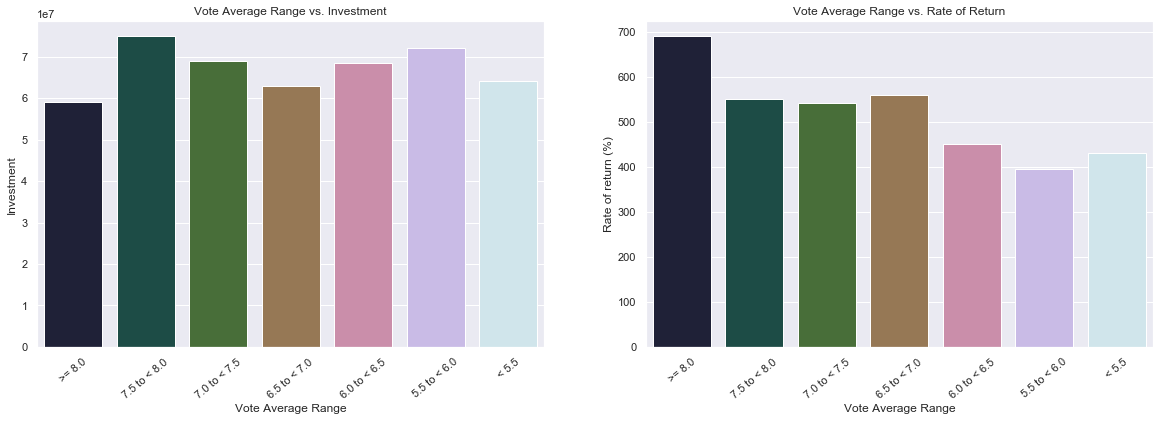

In [91]:
# First step is to create a subplot through matplotlib
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Now we will call sns, the type of bar and the data that will fill each out
chart1 = sns.barplot(ax = axis[0], x='Vavg_range', y='production_budget', data=dfq1, palette="cubehelix")
chart2 = sns.barplot(ax = axis[1], x='Vavg_range', y='rate_of_return', data=dfq1, palette='cubehelix')

#From here onwards it is all about make up for the plots
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=40)
chart1.set(xlabel='Vote Average Range',ylabel='Investment', title='Vote Average Range vs. Investment')
chart1.grid(b=True, which='major', axis='y')

chart2.set_xticklabels(chart2.get_xticklabels(), rotation=40)
chart2.grid(b=True, which='major', axis='y')
chart2.set(xlabel='Vote Average Range',ylabel='Rate of return (%)', title='Vote Average Range vs. Rate of Return')

plt.show()

These two plots are giving quite some interesting information. More detail analysis will be done in the Analysis section below, but as preliminary observations, lets name a few:
1. No correlation between the Vote Average and the Investment. This means that it doesn't matter how much money you invest in your movie, there are no guarantees that the public will like it and therefore result in a large profit. 
2. There is a clear relationship between the vote Average and the rate of return. In general terms, the higher the Vote Average, the higher the rate of return. This was completely expected though. 
3. The highest rate or return, based on the provided data, comes from the movies with the lowest budgets. This doesn't mean the largest profit, but the highest rate of return. 
4. Some of the most expensive movies have generated the lowest profits

With the previous two plots the questions that we wanted to address were answered, however as part of the exercise is to do more plots, we will proceed to try and combine this information on one plot by using the same Vavg_range in the x axis and overlapping the other two variables to see if there is any additional information that we missed:

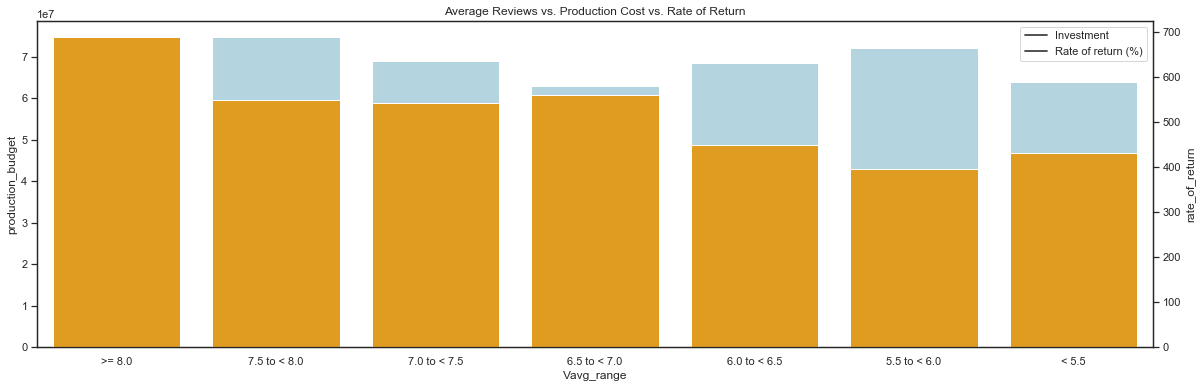

In [112]:
sns.set(style='white', rc={"lines.linewidth":1})
fig, ax1 = plt.subplots(figsize=(20,6))
ax2 = ax1.twinx()

sns.barplot(x='Vavg_range', y='production_budget', data=dfq1, color='lightblue', ax=ax1)
sns.barplot(x='Vavg_range', y='rate_of_return', data=dfq1, color='orange', ax=ax2)
plt.title('Average Reviews vs. Production Cost vs. Rate of Return')
ax1.legend(['Investment', 'Rate of return (%)'], facecolor='w')

plt.show()
sns.set()

The plot is not adding any value as there is no correlation between the production_budget and movie evaluation (Vavg_range). Looking at the orange bars the almost linear trend tied to the increase in the Vavg_range is very clear, but nothing new is really added.

Since we found that the lowest rate of return comes with the highest investment/production budget, lets do a simple horizontal bar plot to see if this becomes clearer. 

<function matplotlib.pyplot.show(*args, **kw)>

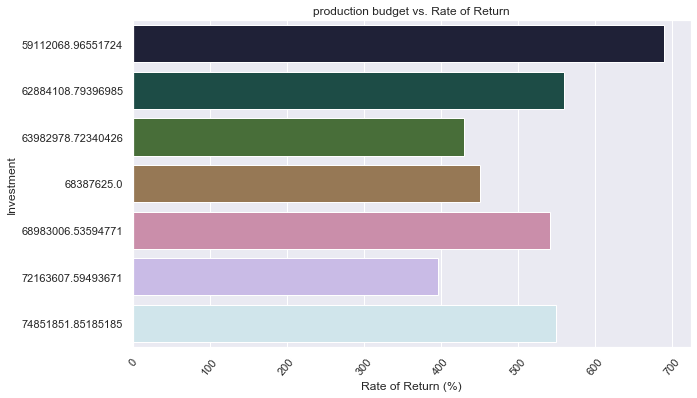

In [118]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y='production_budget', x='rate_of_return', data=dfq1, orient='h', palette='cubehelix')
plt.xticks(rotation=50)

plt.title('production budget vs. Rate of Return')
plt.xlabel('Rate of Return (%)')
plt.ylabel('Investment')
plt.show

This plot is corroborating that there is no real correlation betweeen the money invested and the rate of return. It is better to use as a guide the ratings. Nevertheless there is a bad indicator that the most expensive movies  are giving the lowest rate of return in average

ANALYSIS

When it comes to investing money, we all want to reduce the risk to a minimum and get the highest rate of return possible with the least amount of money. Therefore, you want to de-risk your project by looking at every possible variable to try to understand how they impact your outcome, if you can control them, and if by doing so, can there be an upside to the project? 

With this in mind we decided to look and possible relationships that could affect your rate of return. We took into account only those movies with more than 1000 reviews, hence the overall positive outcome. 

In the these two plots we explore three variables: 'Investment', 'Rate of Return' and the 'Vote Average Range'.

The first plot (left) shows quickly how there is no real correlation between the investment and the 'vote average'. However it does suggest that the movies with the best vote average score are the ones with the lowest investments, which is interesting when we look at the second plot, we see that those are also the movies with the highest rate of return. So this is some food for thought when it comes to deciding on budgets, as it suggests that a big budget movies doesn't guarantee high rate of return. Examples of that can be easily name without even looking at the data provided by Microsoft, although confirmed with their data.

The second plot (right) shows a more linear trend which is expected, as the movies with the highest 'Vote Average' are expected to have the highest 'Rate of Return', why? because the high 'Vote Average' suggest that more people are happy with the movie, resulting in more people paying to see it.

